##Machine Translation Using a Seq2Seq Architecture

---
The goal of this colab is to get you more familiar with the Seq2Seq models and their challenges. For this reason, you will be working on machine translation problem where we would have a sentence as input (in english), and the output is gonna be the translated sentence (in french). So just like what happens with Google Translate.


**Just to give you a heads up:** We won't be having a model performing like Google translate, but at least we will have an idea about how Google Translate works and the challenges that exist with a translation problem.  

## Importing Libraries

We start by importing numpy and pandas and then we can add the rest

In [ ]:
import pandas as pd
import numpy as np

Upload your data here. Here is the [Drive link](https://drive.google.com/drive/folders/10ncj3w7kI9GPx_rz-WfKEGCv4Dz1EYf6?usp=sharing)

## Getting the data

In [ ]:
#Test Your Knowledge

from google.colab import drive
drive.mount('/content/drive')


en_file_path = '/content/drive/MyDrive/en.csv'
fr_file_path = '/content/drive/MyDrive/fr.csv'






Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


We read the english sentences in a dataframe named "english", and the french sentences in a dataframe named "french"

In [ ]:

english = pd.read_csv(en_file_path)

# Print some info to check the data
print(english.head()) # Display the first few rows
print(english.tail())
print(english.info()) # Display data types and non-null counts

  new jersey is sometimes quiet during autumn , and it is snowy in april .
0  the united states is usually chilly during jul...                      
1  california is usually quiet during march , and...                      
2  the united states is sometimes mild during jun...                      
3  your least liked fruit is the grape , but my l...                      
4  his favorite fruit is the orange , but my favo...                      
       new jersey is sometimes quiet during autumn , and it is snowy in april .
137854  france is never busy during march , and it is ...                      
137855  india is sometimes beautiful during spring , a...                      
137856  india is never wet during summer , but it is s...                      
137857  france is never chilly during january , but it...                      
137858  the orange is her favorite fruit , but the ban...                      
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137859 entries, 0 to

In [ ]:

french = pd.read_csv(fr_file_path)
# Check the first few rows to ensure it has been read correctly
print(french.head())
print(french.tail())




  new jersey est parfois calme pendant l' automne , et il est neigeux en avril .
0  les états-unis est généralement froid en juill...                            
1  california est généralement calme en mars , et...                            
2  les états-unis est parfois légère en juin , et...                            
3  votre moins aimé fruit est le raisin , mais mo...                            
4  son fruit préféré est l'orange , mais mon préf...                            
       new jersey est parfois calme pendant l' automne , et il est neigeux en avril .
137854  la france est jamais occupée en mars , et il e...                            
137855  l' inde est parfois belle au printemps , et il...                            
137856  l' inde est jamais mouillé pendant l' été , ma...                            
137857  la france est jamais froid en janvier , mais i...                            
137858  l'orange est son fruit préféré , mais la banan...                           

**How many sentences does each of the files contain?**

In [ ]:
#Test Your Knowledge
english_count=english.shape[0]
french_count=french.shape[0]

print('Number of english sentences:', english_count)
print('Number of french senetnces:',french_count)


Number of english sentences: 137859
Number of french senetnces: 137859


Now let us concatenate the 2 dataframes into one dataframe that we call **df** where one column has the english senetnces and the other has the french sentences

In [ ]:
#Test Your Knowledge
# Select only the first column from each dataframe (assuming first column has the sentences)
english_sentences = english.iloc[:, 0]  # First column of English sentences
french_sentences = french.iloc[:, 0]    # First column of French sentences

# Concatenate the two Series into a new DataFrame
df = pd.concat([english_sentences, french_sentences], axis=1)

Let's name the columns as **English** and **French** so that we access them easier.

In [ ]:
#Test Your Knowledge
df.columns=["English","French"]
df.head()

,English,French
0,the united states is usually chilly during jul...,les états-unis est généralement froid en juill...
1,"california is usually quiet during march , and...","california est généralement calme en mars , et..."
2,the united states is sometimes mild during jun...,"les états-unis est parfois légère en juin , et..."
3,"your least liked fruit is the grape , but my l...","votre moins aimé fruit est le raisin , mais mo..."
4,"his favorite fruit is the orange , but my favo...","son fruit préféré est l'orange , mais mon préf..."


Pick a sentence and print it in both languages

In [ ]:
#Test Your Knowledge
print(df.iloc[1000])

English    their least liked fruit is the orange , but hi...
French     leurs fruits moins aimé est l'orange , mais so...
Name: 1000, dtype: object


##Cleaning Data

The data that we have is almost clean as we can see, we just need to remove the punctuations inside of it.

In [ ]:
#Test Your Knowledge
import string

translator = str.maketrans('', '', string.punctuation)

# Step 3: Remove punctuation from both English and French sentences
df['English'] = df['English'].apply(lambda x: x.translate(translator) if isinstance(x, str) else x)
df['French'] = df['French'].apply(lambda x: x.translate(translator) if isinstance(x, str) else x)



Make sure that the punctuation is removed by printing the example that you printed earlier.

In [ ]:
#Test Your Knowledge
print(df.iloc[1000])

English    their least liked fruit is the orange  but his...
French     leurs fruits moins aimé est lorange  mais son ...
Name: 1000, dtype: object


##Exploring the Data

Add a column **ENG Length** to the dataset that shows how many words does a sentence contain, and do the same for french in a column called **FR Length**

In [ ]:
#Test Your Knowledge
# Add a column for the number of words in the English sentences
df['ENG Length'] = df['English'].apply(lambda x: len(x.split()))

In [ ]:
#Test Your Knowledge
# Add a column for the number of words in the French sentences
df['FR Length'] = df['French'].apply(lambda x: len(x.split()))

# Display the first few rows to confirm
print(df.head())

                                             English  \
0  the united states is usually chilly during jul...   
1  california is usually quiet during march  and ...   
2  the united states is sometimes mild during jun...   
3  your least liked fruit is the grape  but my le...   
4  his favorite fruit is the orange  but my favor...   

                                              French  ENG Length  FR Length  
0  les étatsunis est généralement froid en juille...          15         13  
1  california est généralement calme en mars  et ...          13         13  
2  les étatsunis est parfois légère en juin  et i...          14         13  
3  votre moins aimé fruit est le raisin  mais mon...          14         14  
4  son fruit préféré est lorange  mais mon préfér...          12         11  


Visualize the distribution of the lengths of english sentences and french sentences.

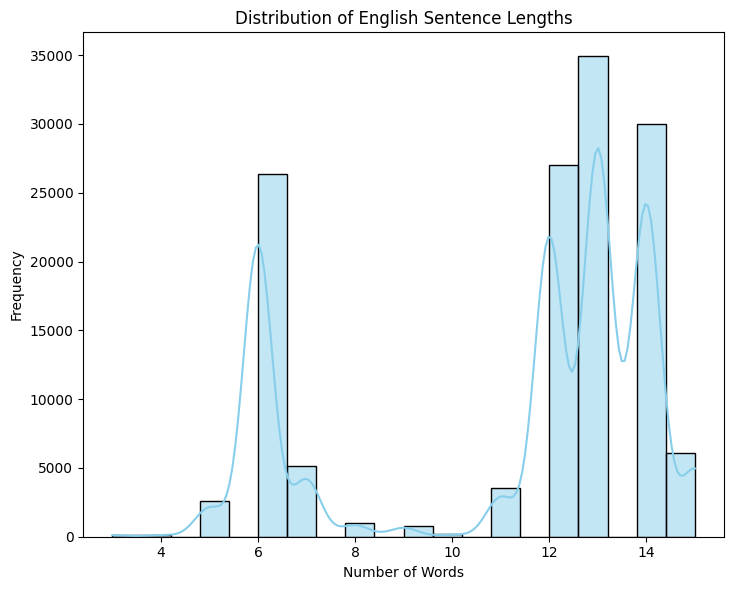

In [ ]:
#Test Your Knowledge
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure and axes
plt.figure(figsize=(14, 6))

# Plot the distribution of English sentence lengths
plt.subplot(1, 2, 1)
sns.histplot(df['ENG Length'], kde=True, bins=20, color='skyblue')
plt.title('Distribution of English Sentence Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')

# Display the plots
plt.tight_layout()
plt.show()


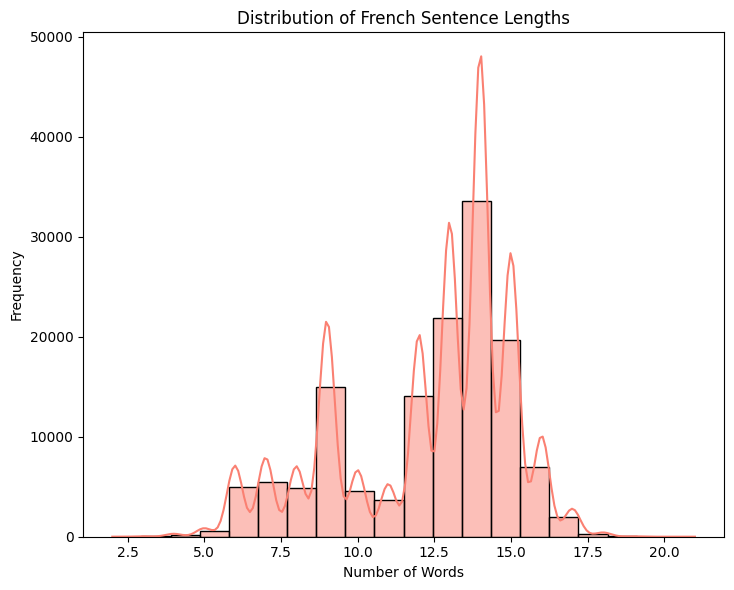

In [ ]:
#Test Your Knowledge
# Set up the figure and axes
plt.figure(figsize=(14, 6))
# Plot the distribution of French sentence lengths
plt.subplot(1, 2, 2)
sns.histplot(df['FR Length'], kde=True, bins=20, color='salmon')
plt.title('Distribution of French Sentence Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
# Display the plots
plt.tight_layout()
plt.show()

Get the maximum length of an english sentence and the maximum length of a french sentence.

In [ ]:
#Test Your Knowledge
# Get the maximum length of English and French sentences
max_eng_length = df['ENG Length'].max()
max_fr_length = df['FR Length'].max()

print(f"Maximum length of an English sentence: {max_eng_length} words")
print(f"Maximum length of a French sentence: {max_fr_length} words")


Maximum length of an English sentence: 15 words
Maximum length of a French sentence: 21 words


##Preprocessing the Data

In order for the data to be fed to the model, it has to be tokenized and padded.

####Tokenization

**To tokenize english and french sentences, we can use only one tokenizer. True or False?**

False.

For a translation model, you generally need two separate tokenizers: one for English and one for French. This is because English and French have different vocabularies, and a single tokenizer would not be able to manage the distinct words, grammar, and structure of both languages effectively.

Using two tokenizers allows each language's unique vocabulary to be properly tokenized, which is essential for a translation task.

Tokenize the sentences that we have.

In [ ]:
#Test Your Knowledge
from tensorflow.keras.preprocessing.text import Tokenizer

# Define start and end tokens
START_TOKEN = "<start>"
END_TOKEN = "<end>"

# Add start and end tokens to each French sentence
df['French'] = df['French'].apply(lambda x: f"{START_TOKEN} {x} {END_TOKEN}")


# Create a tokenizer for English sentences
english_tokenizer = Tokenizer()
english_tokenizer.fit_on_texts(df['English'])


# Create a tokenizer for French sentences
french_tokenizer = Tokenizer()
french_tokenizer.fit_on_texts(df['French'])


# Convert English sentences to sequences
english_sequences = english_tokenizer.texts_to_sequences(df['English'])
# Convert French sentences to sequences
french_sequences = french_tokenizer.texts_to_sequences(df['French'])

# Check the first few entries of the word index (mapping of words to their index)
print("English word index (first 5 entries):", dict(list(english_tokenizer.word_index.items())[:5]))  # Accessing first 5 entries of the word_index dictionary
print("French word index (first 5 entries):", dict(list(french_tokenizer.word_index.items())[:5]))  # Accessing first 5 entries of the word_index dictionary

print('English sequences', english_sequences[:5])
print('French sequences', french_sequences[:5])



English word index (first 5 entries): {'is': 1, 'in': 2, 'it': 3, 'during': 4, 'the': 5}
French word index (first 5 entries): {'est': 1, 'start': 2, 'end': 3, 'en': 4, 'il': 5}
English sequences [[5, 20, 21, 1, 9, 62, 4, 43, 7, 3, 1, 9, 51, 2, 45], [22, 1, 9, 67, 4, 38, 7, 3, 1, 9, 68, 2, 34], [5, 20, 21, 1, 8, 64, 4, 34, 7, 3, 1, 57, 2, 42], [29, 12, 16, 13, 1, 5, 82, 6, 30, 12, 16, 1, 5, 83], [31, 11, 13, 1, 5, 84, 6, 30, 11, 1, 5, 82]]
French sequences [[2, 6, 33, 1, 14, 21, 4, 50, 8, 5, 96, 70, 4, 52, 3], [2, 102, 1, 14, 68, 4, 46, 8, 5, 1, 14, 23, 4, 42, 3], [2, 6, 33, 1, 10, 270, 4, 42, 8, 5, 104, 21, 4, 49, 3], [2, 41, 15, 16, 18, 1, 12, 83, 7, 40, 15, 16, 1, 9, 84, 3], [2, 22, 18, 19, 1, 85, 7, 40, 19, 1, 12, 83, 3]]


**How many unique words do we have in english and in french?**

In [ ]:
#Test Your Knowledge
# Get the number of unique words in English
num_unique_english_words = len(english_tokenizer.word_index) + 1  # Adding 1 for padding token (0)
print(f"Number of unique words in English: {num_unique_english_words}")

# Get the number of unique words in French
num_unique_french_words = len(french_tokenizer.word_index) + 1  # Adding 1 for padding token (0)
print(f"Number of unique words in French: {num_unique_french_words}")


Number of unique words in English: 200
Number of unique words in French: 347


####Padding

**What should be the length of the sequences that we have after padding?**

The length of the sequences after padding should match the maximum sentence length found in the dataset, which is determined by the longest English or French sentence, ensuring that all sequences are uniform in length for model training.

Perform padding on the sequences that we have.

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Set the maximum length for padding
# use the max length of your sequences
max_length = max(max(len(seq) for seq in english_sequences), max(len(seq) for seq in french_sequences))
print(max_length)

# Pad English sequences
english_padded = pad_sequences(english_sequences, maxlen=max_length, padding='post', truncating='post')

# Pad French sequences
french_padded = pad_sequences(french_sequences, maxlen=max_length, padding='post', truncating='post')


# Check the shape of the padded sequences
print("Padded English sequences shape:", english_padded.shape)
print("Padded French sequences shape:", french_padded.shape)

# Display a few examples of the padded sequences
print("Padded English sequences sample:", english_padded[:5])
print("Padded French sequences sample:", french_padded[:5])


23
Padded English sequences shape: (137859, 23)
Padded French sequences shape: (137859, 23)
Padded English sequences sample: [[ 5 20 21  1  9 62  4 43  7  3  1  9 51  2 45  0  0  0  0  0  0  0  0]
 [22  1  9 67  4 38  7  3  1  9 68  2 34  0  0  0  0  0  0  0  0  0  0]
 [ 5 20 21  1  8 64  4 34  7  3  1 57  2 42  0  0  0  0  0  0  0  0  0]
 [29 12 16 13  1  5 82  6 30 12 16  1  5 83  0  0  0  0  0  0  0  0  0]
 [31 11 13  1  5 84  6 30 11  1  5 82  0  0  0  0  0  0  0  0  0  0  0]]
Padded French sequences sample: [[  2   6  33   1  14  21   4  50   8   5  96  70   4  52   3   0   0   0
    0   0   0   0   0]
 [  2 102   1  14  68   4  46   8   5   1  14  23   4  42   3   0   0   0
    0   0   0   0   0]
 [  2   6  33   1  10 270   4  42   8   5 104  21   4  49   3   0   0   0
    0   0   0   0   0]
 [  2  41  15  16  18   1  12  83   7  40  15  16   1   9  84   3   0   0
    0   0   0   0   0]
 [  2  22  18  19   1  85   7  40  19   1  12  83   3   0   0   0   0   0
    0   0   0   0   

##Modeling

After preprrocessing the data, we can build our model. Start by building a baseline architecture relying on one directional RNNs, LSTMs, or GRUs. It will be good to lookup how to build Seq2Seq models, there are some new layers that will help you like RepeatVector and TimeDistributed.

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Embedding, RepeatVector,  TimeDistributed

# Define parameters
vocab_size_english = len(english_tokenizer.word_index) + 1  # +1 for padding
vocab_size_french = len(french_tokenizer.word_index) + 1    # +1 for padding
embedding_dim = 256  # Dimension for embedding layer
lstm_units = 256     # Number of LSTM units (reduced for baseline)
max_length_english = english_padded.shape[1]
max_length_french = french_padded.shape[1]

# Define the encoder
encoder_input = Input(shape=(max_length_english ,))
encoder_embedding = Embedding(input_dim=vocab_size_english, output_dim=embedding_dim)(encoder_input)
encoder_lstm = LSTM(lstm_units, return_state=True)  # Return the hidden state
encoder_outputs, state_h, state_c = encoder_lstm(encoder_embedding)
encoder_states = [state_h, state_c]  # Encoder states to be passed to the decoder

# Repeat the encoder output (context vector) to match the decoder sequence length
context_vector = RepeatVector(max_length_french-1)(state_h)  # Repeat context vector for each time step

# Define the decoder
decoder_input = Input(shape=(max_length_french-1,))
decoder_embedding = Embedding(input_dim=vocab_size_french, output_dim=embedding_dim)(decoder_input)
decoder_lstm = LSTM(lstm_units, return_sequences=True)  # Return sequences for TimeDistributed
decoder_outputs = decoder_lstm(decoder_embedding, initial_state=encoder_states)
decoder_outputs = TimeDistributed(Dense(vocab_size_french, activation='softmax'))(decoder_outputs)

# Create the model
model = Model([encoder_input, decoder_input], decoder_outputs)

# Print model summary
model.summary()



Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 23)             │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_1             │ (None, 22)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding (Embedding)     │ (None, 23, 256)        │         51,200 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_1 (Embedding)   │ (None, 22, 256)        │         88,832 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm (LSTM)               │ [(None, 256), (None,   │        525,312 │ embedding[0][0]        │
│                           │ 256), (None, 256)]     │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_1 (LSTM)             │ (None, 22, 256)        │        525,312 │ embedding_1[0][0],     │
│                           │                        │                │ lstm[0][1], lstm[0][2] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ time_distributed          │ (None, 22, 347)        │         89,179 │ lstm_1[0][0]           │
│ (TimeDistributed)         │                        │                │                        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 1,279,835 (4.88 MB)

 Trainable params: 1,279,835 (4.88 MB)

 Non-trainable params: 0 (0.00 B)

Compile and train the model.
**FYI:** While specifying the architecture of your model and the number of epochs for training, keeep in your mind that your model might take A LOT of time to train.

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Reshape the target data
y_train = french_padded[:, 1:]  # Skip the first token (usually <start>)

# Train the model
history = model.fit(
    [english_padded, french_padded[:, :-1]],  # Encoder and decoder input (excluding the last token)
    y_train,                          # Target data
    batch_size=64,                             # Adjust batch size as needed
    epochs=8,                                # Number of epochs
    validation_split=0.2                       # Use 20% of the data for validation
)




Epoch 1/8
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 610s 348ms/step - accuracy: 0.7106 - loss: 1.1646 - val_accuracy: 0.8882 - val_loss: 0.3262
Epoch 2/8
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 623s 348ms/step - accuracy: 0.9312 - loss: 0.2127 - val_accuracy: 0.9853 - val_loss: 0.0532
Epoch 3/8
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 617s 345ms/step - accuracy: 0.9878 - loss: 0.0426 - val_accuracy: 0.9904 - val_loss: 0.0311
Epoch 4/8
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 664s 370ms/step - accuracy: 0.9924 - loss: 0.0249 - val_accuracy: 0.9933 - val_loss: 0.0220
Epoch 5/8
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 637s 344ms/step - accuracy: 0.9947 - loss: 0.0175 - val_accuracy: 0.9950 - val_loss: 0.0169
Epoch 6/8
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 624s 345ms/step - accuracy: 0.9959 - loss: 0.0134 - val_accuracy: 0.9950 - val_loss: 0.0163
Epoch 7/8
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 666s 371ms/step - accuracy: 0.9966 - loss: 0.0111 - val_accuracy: 0.9962 - val_loss: 0.0125
Epoch 8/8
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 642s 348ms/step - accuracy: 

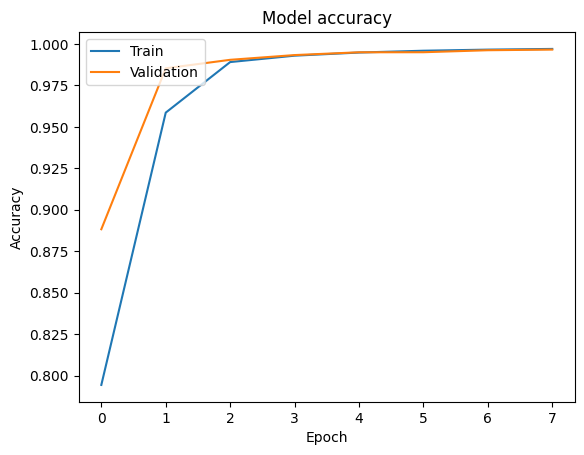

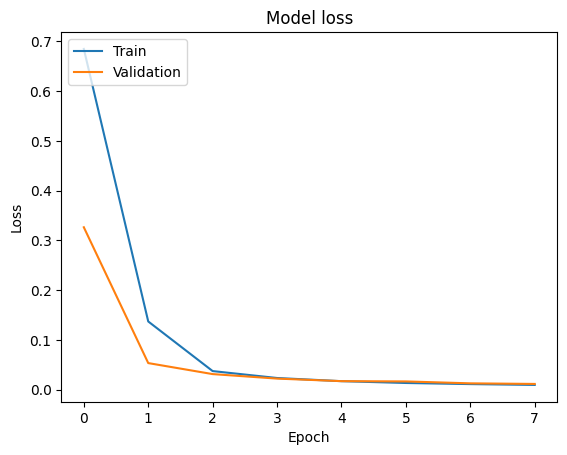

In [21]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


Define a function that gets an input sentence in english and gives the output sentence in the french language.

In [22]:
def translate_sentence(input_sentence, english_tokenizer, french_tokenizer, model, max_length_french):
    # Step 1: Tokenize the input sentence
    input_sequence = english_tokenizer.texts_to_sequences([input_sentence])
    input_padded = pad_sequences(input_sequence, maxlen=max_length_english, padding='post')

    # Step 2: Prepare decoder input (starts with the start token)
    decoder_input = np.zeros((1, max_length_french - 1))  # Batch size of 1
    decoder_input[0, 0] = french_tokenizer.word_index['start']  # Use 'start'

    # Step 3: Generate the translation
    for t in range(1, max_length_french):  # Generate until max length
        output = model.predict([input_padded, decoder_input])
        predicted_id = np.argmax(output[0, t - 1, :])  # Get the predicted word index

        # Stop if the predicted word is the end token
        if predicted_id == french_tokenizer.word_index['end']:
            break

        # Update the decoder input with the predicted word
        decoder_input[0, t] = predicted_id

    # Step 4: Convert the predicted indices back to words, skipping 'start' token
    translated_sentence = ' '.join(french_tokenizer.index_word[idx] for idx in decoder_input[0] if idx > 0 and idx != french_tokenizer.word_index['start'])

    return translated_sentence


Test the following sentence

In [23]:
english_sentence = "she drives the truck"
french_translation = translate_sentence(english_sentence, english_tokenizer, french_tokenizer, model,  max_length_french)
print(french_translation)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
elle pousse le nouveau camion jaune


The output should have been: Elle conduit le camion.                                    
The model is clearly hallucinating.




Try to improve your model by modifying the architecture to take into account bidirectionality which is very useful in Machine Translation. Create a new model called model2

In [ ]:
#Test Your Knowledge
from keras.models import Model
from keras.layers import Input, LSTM, Embedding, Dense, Bidirectional

# Define parameters
vocab_size_english = len(english_tokenizer.word_index) + 1  # Plus one for padding
vocab_size_french = len(french_tokenizer.word_index) + 1  # Plus one for padding
embedding_dim = 256
hidden_units = 512

# Define the encoder
encoder_inputs = Input(shape=(max_length_english,))
encoder_embedding = Embedding(input_dim=vocab_size_english, output_dim=embedding_dim)(encoder_inputs)
encoder = Bidirectional(LSTM(hidden_units, return_sequences=True, return_state=True))
encoder_outputs, forward_h, forward_c, backward_h, backward_c = encoder(encoder_embedding)
# Concatenate the forward and backward hidden states
state_h = Dense(hidden_units)(forward_h) + Dense(hidden_units)(backward_h)
state_c = Dense(hidden_units)(forward_c) + Dense(hidden_units)(backward_c)
encoder_states = [state_h, state_c]

# Repeat the encoder output (context vector) to match the decoder sequence length
context_vector = RepeatVector(max_length_french-1)(state_h)  # Repeat context vector for each time step

# Define the decoder
decoder_inputs = Input(shape=(max_length_french - 1,))
decoder_embedding = Embedding(input_dim=vocab_size_french, output_dim=embedding_dim)(decoder_inputs)
decoder_lstm = LSTM(hidden_units, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_embedding, initial_state=encoder_states)
decoder_dense = Dense(vocab_size_french, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

# Define the model
model2 = Model([encoder_inputs, decoder_inputs], decoder_outputs)



# Summary of the model
model2.summary()


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4             │ (None, 23)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_4 (Embedding)   │ (None, 23, 256)        │         51,200 │ input_layer_4[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bidirectional             │ [(None, 23, 1024),     │      3,149,824 │ embedding_4[0][0]      │
│ (Bidirectional)           │ (None, 512), (None,    │                │                        │
│                           │ 512), (None, 512),     │                │                        │
│                           │ (None, 512)]           │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_5             │ (None, 22)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 512)            │        262,656 │ bidirectional[0][1]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 512)            │        262,656 │ bidirectional[0][3]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_4 (Dense)           │ (None, 512)            │        262,656 │ bidirectional[0][2]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_5 (Dense)           │ (None, 512)            │        262,656 │ bidirectional[0][4]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_5 (Embedding)   │ (None, 22, 256)        │         88,832 │ input_layer_5[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 512)            │              0 │ dense_2[0][0],         │
│                           │                        │                │ dense_3[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_1 (Add)               │ (None, 512)            │              0 │ dense_4[0][0],         │
│                           │                        │                │ dense_5[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_5 (LSTM)             │ [(None, 22, 512),      │      1,574,912 │ embedding_5[0][0],     │
│                           │ (None, 512), (None,    │                │ add[0][0], add_1[0][0] │
│                           │ 512)]                  │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_6 (Dense)           │ (None, 22, 347)        │        178,011 │ lstm_5[0][0]           │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 6,093,403 (23.24 MB)

 Trainable params: 6,093,403 (23.24 MB)

 Non-trainable params: 0 (0.00 B)

compile and train your new model.

Epoch 1/8
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 53s 29ms/step - accuracy: 0.7433 - loss: 0.9687 - val_accuracy: 0.8944 - val_loss: 0.2910
Epoch 2/8
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 81s 29ms/step - accuracy: 0.9340 - loss: 0.1860 - val_accuracy: 0.9878 - val_loss: 0.0399
Epoch 3/8
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - accuracy: 0.9892 - loss: 0.0338 - val_accuracy: 0.9919 - val_loss: 0.0250
Epoch 4/8
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - accuracy: 0.9935 - loss: 0.0202 - val_accuracy: 0.9936 - val_loss: 0.0207
Epoch 5/8
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 81s 28ms/step - accuracy: 0.9948 - loss: 0.0157 - val_accuracy: 0.9949 - val_loss: 0.0162
Epoch 6/8
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 49s 29ms/step - accuracy: 0.9958 - loss: 0.0130 - val_accuracy: 0.9959 - val_loss: 0.0132
Epoch 7/8
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 83s 29ms/step - accuracy: 0.9967 - loss: 0.0103 - val_accuracy: 0.9957 - val_loss: 0.0138
Epoch 8/8
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - accuracy: 0.9969 - loss: 0

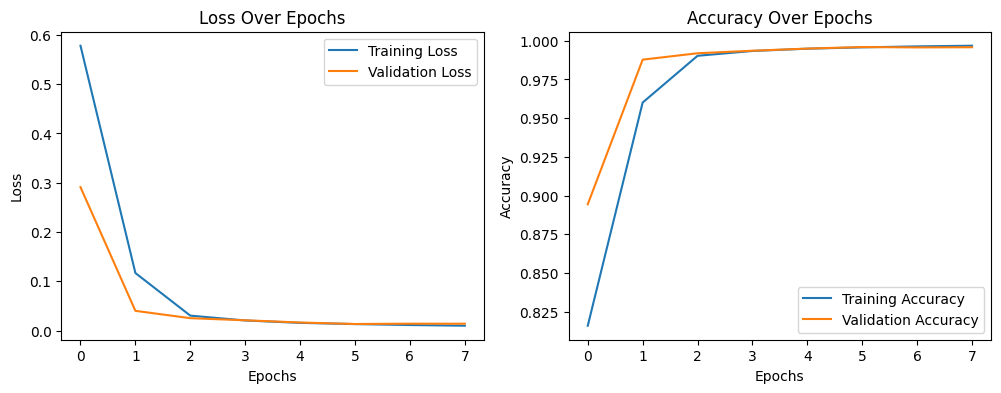

In [ ]:
#Test Your Knowledge

# Define X_train and y_train
X_train = english_padded  # Input sequences (English sentences)
y_train = french_padded    # Target sequences (French sentences)


# we used a start token and we want to predict without it, so we will shift y_train
y_train_shifted = np.zeros_like(y_train)
y_train_shifted[:, :-1] = y_train[:, 1:]  # Shift to remove the start token from targets



# Compile model2
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model2.fit(
    [english_padded, french_padded[:, :-1]],  # Inputs: English sentences and shifted French sentences
    y_train[:, 1:, np.newaxis],  # Targets: French sentences without the start token
    batch_size=64,  # Adjust based on your GPU memory
    epochs=8,      # Adjust number of epochs as necessary
    validation_split=0.2  # Use 20% of the data for validation
)

# Plotting training and validation loss and accuracy
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


Define a new function that relies on your new model to make predictions.

In [ ]:

def translate_sentence_with_model2(input_sentence, english_tokenizer, french_tokenizer, model2, max_length_english, max_length_french):
    # Step 1: Tokenize and pad the input sentence
    input_sequence = english_tokenizer.texts_to_sequences([input_sentence])
    input_padded = pad_sequences(input_sequence, maxlen=max_length_english, padding='post')

    # Step 2: Prepare the initial decoder input with the start token
    decoder_input = np.zeros((1, max_length_french-1))  # Initialize with zeros for the max French length
    decoder_input[0, 0] = french_tokenizer.word_index['start']  # Assuming 'start' is the start token

    # Step 3: Generate translation
    for t in range(1, max_length_french):  # Loop through each position in the French sentence
        # Predict the next word in the sequence
        predictions = model2.predict([input_padded, decoder_input], verbose=0)
        predicted_id = np.argmax(predictions[0, t - 1, :])  # Get the index of the highest probability

        # Break if end token is predicted
        if predicted_id == french_tokenizer.word_index['end']:
            break

        # Update the decoder input with the predicted word
        decoder_input[0, t] = predicted_id

    # Step 4: Convert predicted word indices back to words, skipping the start token
    translated_sentence = ' '.join(
        french_tokenizer.index_word[idx] for idx in decoder_input[0] if idx > 0 and idx != french_tokenizer.word_index['start'] and idx in french_tokenizer.index_word
    )

    return translated_sentence


In [ ]:
input = "she is driving the truck"

#Test Your Knowledge
translated_sentence = translate_sentence_with_model2(input, english_tokenizer, french_tokenizer, model2, max_length_english, max_length_french)
print(translated_sentence)

elle conduit le petit camion rouge


**What is another adjustment in terms of architecture that you might be able to do to improve your model?**

One potential adjustment to improve the model's architecture is to incorporate Attention Mechanisms in both the encoder and the decoder. The current model might not be fully utilizing the relationships between words across different positions in the input and output sequences. Attention allows the model to focus on specific parts of the input sequence when generating each word in the output sequence, which is particularly useful for long sequences where the relationships between words may be distant.

In particular, a self-attention mechanism in both the encoder and decoder can enhance the model's ability to understand context by allowing each word to attend to all other words in the sentence, regardless of their position. This would help improve translation accuracy, especially in sentences where the meaning of a word depends on other words elsewhere in the sequence.

Additionally, transformer-based models that rely entirely on attention mechanisms could be considered. These models, which do not rely on recurrent layers like LSTMs, have shown superior performance in sequence-to-sequence tasks such as translation due to their ability to better capture global dependencies and their parallelization capabilities.

**What are some additional ways that we can do to improve the performance of our model?**

To improve the performance of our model we can:

**-**Perform Hyperparamater tuning ( learning rate, number of hidden layers, epochs , batch size).                                                            
**-** Perform better tokenization using either subword tokenization that can help handle out-of-vocabulary (OOV) words and make the model more robust to unseen words. Or using wordpiece tokenization that splits words into smaller meaningful chunks, which helps in reducing the vocabulary size and improving the model's generalization ability.                                               
**-** Apply dropout regularization at different stages of the model which prevents overfitting.                                                                   
**-** Apply L2 regularization.                                                   
**-** Use ensemble methods.                                                     
**-**  Seq2Seq with Preprocessing : Byte Pair Encoding (BPE), instead of using word-based tokenization, you can use BPE, which breaks down rare words into more frequent subword units, reducing the vocabulary size and helping to handle rare words more effectively.                                             






# Video Recording Link

**A short (10 minutes max) recorded video where you explain your solution.
Make sure your face is visible in the video, as if you’re presenting your
work during a job interview.**

[Share The Link Here]
https://drive.google.com/file/d/1mfsmH_SBdr9Ehzir_EyLlq8tQ64hJYCG/view?usp=drive_link